In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def corr_map(corr):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))

    # Draw the heatmap with the mask and correct aspect ratio
    plt.title("Correlation Matrix", size=18)
    sns.heatmap(corr, mask=mask, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .6})    
    return plt.show()

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('lending_clean_data.csv')

In [5]:
corr = df.corr()

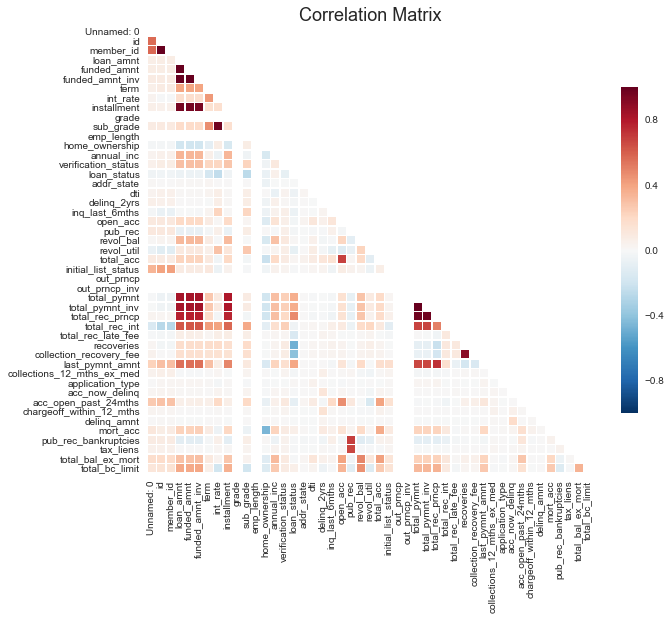

In [6]:
sns.set(style="whitegrid")
corr_map(corr)

##### MLPClassifier

In [32]:
### MLPClassifier ###
# Use the final clean dataframe: clean_df
from sklearn.model_selection import train_test_split
y= df.loan_status
X = df.drop(["loan_status"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=.25)

In [33]:
# Scaler Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [35]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions, normalize = True))
print(confusion_matrix(y_test,predictions))

0.999318126471
[[23954    66]
 [   18 99152]]


In [36]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     24020
        1.0       1.00      1.00      1.00     99170

avg / total       1.00      1.00      1.00    123190



##### Naive Bayes

0 0.840839353844
[[22610  1680]
 [17927 80973]]
1 0.840839353844
[[22610  1680]
 [17927 80973]]
2 0.840839353844
[[22610  1680]
 [17927 80973]]
3 0.840839353844
[[22610  1680]
 [17927 80973]]
4 0.840839353844
[[22610  1680]
 [17927 80973]]


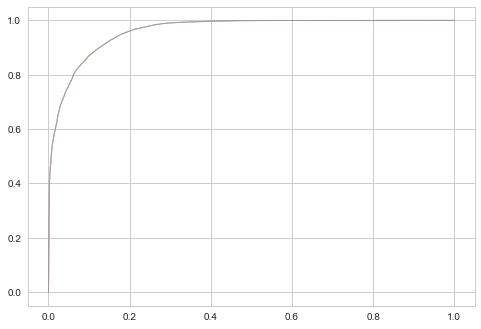

In [37]:
### Naive Bayes ###
# Use the same X and y above
# K-fold Cross-validation
import  sklearn.model_selection 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

total = []
# Create a k-fold object
nfold = 5
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# Loop over the folds
for isplit, Ind in enumerate(kf.split(X)):
        
    # Get the training data in the split
    xtr, xts, ytr, yts = train_test_split(X, y, random_state=89, test_size=.25)
    
    clf = GaussianNB()
    clf.fit(xtr, ytr)
    y_pred = clf.predict(xts)
    acc = accuracy_score(y_pred, yts, normalize = True)
    #auc = metrics.roc_auc_score(target_test,target_pred)
    probas_ = clf.fit(xtr, ytr).predict_proba(xts)
    fpr, tpr, thresholds = roc_curve(yts, probas_[:, 1])
    #roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3)
    print(isplit,acc)
    print(metrics.confusion_matrix(yts,y_pred))

##### Random Forest

In [39]:
### Random Forest ###
# Use the final clean dataframe: clean_df
from sklearn.model_selection import train_test_split
y= df.loan_status
X = df.drop(["loan_status"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=92, test_size=.25)

In [40]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

importances = forest.feature_importances_

In [41]:
# Print the feature ranking
print("Top 20 Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), df.drop('loan_status', axis=1).columns), reverse=True)[:20]:
    print(v + ": " + str(k))

Top 20 Feature importance ranking by Random Forest Model:
total_rec_prncp: 0.2008
recoveries: 0.1931
collection_recovery_fee: 0.1234
total_pymnt_inv: 0.0901
last_pymnt_amnt: 0.0892
total_pymnt: 0.0795
loan_amnt: 0.0526
funded_amnt_inv: 0.0467
funded_amnt: 0.0288
installment: 0.0193
total_rec_int: 0.0187
Unnamed: 0: 0.0094
term: 0.0088
sub_grade: 0.0065
member_id: 0.0059
total_rec_late_fee: 0.005
int_rate: 0.0049
id: 0.0049
revol_bal: 0.0017
dti: 0.0017


In [43]:
predicted = forest.predict(X_test)
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test, predicted, normalize = True))
matrix = confusion_matrix(y_test, predicted)
print(matrix)

0.999163893173
[[24050   102]
 [    1 99037]]


##### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [173]:
# Scaler Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=95, test_size=.25)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [174]:
c_space = np.logspace(-0.8, -0.5, 10)
param_grid = {'C': c_space}

In [175]:
for i in c_space:
    print(round(i,2))

0.16
0.17
0.18
0.2
0.22
0.23
0.25
0.27
0.29
0.32


In [176]:
logreg_cv = GridSearchCV(LogisticRegression(penalty='l1'), param_grid, cv=5)

In [177]:
logreg_cv.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([ 0.15849,  0.17113,  0.18478,  0.19953,  0.21544,  0.23263,
        0.25119,  0.27123,  0.29286,  0.31623])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [178]:
logreg_cv.best_params_

{'C': 0.29286445646252368}

In [179]:
logreg_cv.best_score_

0.98199999999999998

In [21]:
logL1 = LogisticRegression(penalty='l1')

logL1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
for k,v in sorted(zip(map(lambda x: round(abs(x), 4),logL1.coef_[0]), X.columns), reverse=True)[:20]:
    print(v + ": " + str(k))

recoveries: 104.216
funded_amnt: 61.3298
total_rec_prncp: 52.6954
funded_amnt_inv: 45.724
total_pymnt_inv: 40.051
total_pymnt: 33.2486
total_rec_int: 15.5403
installment: 3.5331
last_pymnt_amnt: 2.6225
loan_amnt: 1.565
term: 0.4189
id: 0.416
total_rec_late_fee: 0.3392
int_rate: 0.311
annual_inc: 0.2881
Unnamed: 0: 0.2031
revol_bal: 0.1365
open_acc: 0.1356
acc_now_delinq: 0.1147
chargeoff_within_12_mths: 0.1011


In [53]:
logL1_pred = logL1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logL1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82108


In [180]:
help(logL1.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.logistic.LogisticRegression instance
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [25]:
logL2 = LogisticRegression(penalty='l2')
logL2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
logL2_pred = logL2.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logL2.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80947


In [52]:
print(len(y_test),len(y_train))

123190 369568


In [51]:
len(logL2_pred)

123190